# An eye for feature engineering

## Baseline

In [266]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

In [267]:
dino = pd.read_csv("https://storage.googleapis.com/aiolympiadmy/maio_2025_eye_for_feature_engineering.csv", index_col=0)

In [268]:
X, y = dino[["feature1", "feature2"]], dino["class"]

In [269]:
def create_new_feature(X):
    return X["feature1"]

In [270]:
# Create the feature itself
X["feature3"] = create_new_feature(X)

In [271]:
logreg = LogisticRegression()

In [272]:
logreg.fit(X, y)
y_pred_logreg = logreg.predict(X)

In [273]:
print("Logreg precision / recall / f1_score", 
    precision_score(y, y_pred_logreg, zero_division=0, pos_label=1, average="binary"), 
    recall_score(y, y_pred_logreg, zero_division=0, pos_label=1, average="binary"),
    f1_score(y, y_pred_logreg, zero_division=0, pos_label=1, average="binary")
)

Logreg precision / recall / f1_score 0.0 0.0 0.0


## Your task

Above is a peculiar dataset passed through a logistic regression classifier. Notice that the baseline example provided above scores 0 for precision, recall and F1 score. (Google / ask ChatGPT and friends if you're learning of these terms for the first time!)

Do what you can to raise the F1 score as much as possible, subject to the following restrictions:

- You cannot edit the existing model prediction logic in the Your Submission section:
    - except for the cell containing `create_new_feature()` itself
    - except for the cell marked for you to import new libraries
- You can still add new code cells to this notebooks under the Scratchpad section below. Do all your exploration and testing here. However, code in Your Submission must not depend on code in your Scratchpad in any way. Only code from Your Submission will be run during evaluation.

This challenge will be graded via notebook submission only. Scoring as follows:

- Up to 10 pts for model performance, F1 score X 10. Partial credit may be granted for incomplete submissions at discretion. So show your work below!
- +3 pts if F1 score >= 0.5 and no neural networks are involved. Neural networks here are strictly defined as the use of learnable weights and biases
- +2 pts if F1 score >= 0.5 and the `%%timeit` cell reports runtime <= 10 milliseconds


### Scratchpad

In [274]:
# Write all your exploratory code here

## Your submission

In [275]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

```
EXPLANATION:

I used DBSCAN because it can let me tune the parameters (the maximum distance between points in the same cluster (variable 'eps'), and also the minimum points required to form a cluster (variable 'min_samples'))

I saw that the smallest cluster consists of 3 points, so I put min_samples=3. I then wrote a code to visualise out the colour-coded clusters to make sure that I was on track.

I did trial-and-error and found out that the sweet spot for the maximum distance between points in the same cluster is 7, so I put eps=7. That's how I solved this question.
```

In [276]:
# EDIT ME - import additional libraries here
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

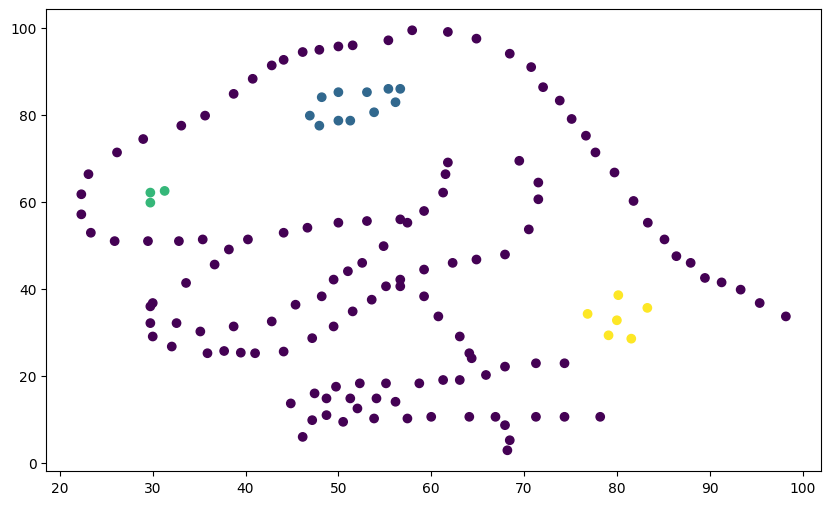

In [277]:
# EDIT ME
def create_new_feature(X, plot=False):
    X_array = X[["feature1", "feature2"]].values
    dbscan = DBSCAN(eps=7, min_samples=3)
    labels = dbscan.fit_predict(X_array)
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.scatter(X_array[:, 0], X_array[:, 1], c = labels)
        plt.show()
    
    return labels

labels = create_new_feature(dino, plot=True)

In [278]:
%%timeit -n 10
# DO NOT EDIT - timing cell
create_new_feature(X)

1.06 ms ± 69.4 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [279]:
# DO NOT EDIT - scoring cell
X["feature3"] = create_new_feature(X)

logreg = LogisticRegression()
logreg.fit(X, y)
y_pred_logreg = logreg.predict(X)

print("Logreg precision / recall", 
    precision_score(y, y_pred_logreg, zero_division=0, pos_label=1, average="binary"), 
    recall_score(y, y_pred_logreg, zero_division=0, pos_label=1, average="binary"),
    f1_score(y, y_pred_logreg, zero_division=0, pos_label=1, average="binary")
)

Logreg precision / recall 1.0 1.0 1.0
